# Movie lens Case Study project 2###

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load dataset
movie_data = pd.read_csv("C:\\rohit\\simple\\practice project2\\movies.dat",
                       sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
users_data = pd.read_csv("C:\\rohit\\simple\\practice project2\\users.dat",
                       sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("C:\\rohit\\simple\\practice project2\\ratings.dat",
                       sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')


#### Descriptive statistics   

In [3]:
# On movie_data
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data.shape

(3883, 3)

In [5]:
movie_data.isnull().sum()
# Results show that no columns are empty or null

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
movie_data.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int32
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


In [8]:
# On users data
users_data.shape

(6040, 5)

In [9]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
users_data.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int32
Gender        6040 non-null object
Age           6040 non-null int32
Occupation    6040 non-null int32
Zip-code      6040 non-null object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


In [12]:
users_data.isnull().sum()
# Results show that no columns are empty or null

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [13]:
# On Ratings data
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
ratings_data.shape

(1000209, 4)

In [15]:
ratings_data.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [16]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int32
MovieID      1000209 non-null int32
Rating       1000209 non-null int32
Timestamp    1000209 non-null object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


In [17]:
ratings_data.isnull().sum()
# Results show that no columns are empty or null

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

#### Master Data : New Dataset creation

In [18]:
#merge rating and users data
df_user_rating = users_data.merge(ratings_data,how='left',left_on=['UserID'], right_on=['UserID'])

In [19]:
#merge with movie data to create Master Data
Master_Data = df_user_rating.merge(movie_data, how='left', left_on=['MovieID'], right_on=['MovieID'])

In [20]:
#print Fisrt five Records
Master_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [21]:
#print columns of Master Data
Master_Data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID',
       'Rating', 'Timestamp', 'Title', 'Genres'],
      dtype='object')

In [22]:
#create data frame with required columns
col = ['MovieID','Title','UserID','Age','Gender','Occupation','Rating'] 
Master_Data = Master_Data[col]

In [23]:
#print Fisrt five Records
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


#### Explore Datasets

In [24]:
#User Age distribution
age_group = users_data.groupby('Age').size()
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

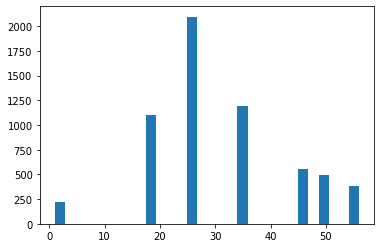

In [25]:
plt.hist(data=age_group,x=[users_data.Age], bins=30)
plt.show()
#users_data['Age']

###### Maximun users are around 25 years of age. Around 75% users are in the age group of 18 to 35 years

In [26]:
gender_group = users_data.groupby('Gender').size()
gender_group

Gender
F    1709
M    4331
dtype: int64

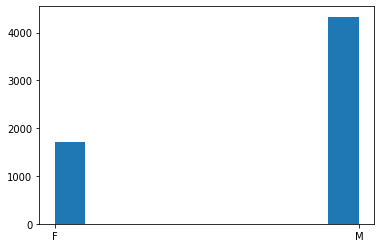

In [27]:
plt.hist(data=gender_group,x=[users_data.Gender])
plt.show()

###### More male users than female users

In [28]:
#user ratings
user_group = ratings_data.groupby(['UserID']).size()
user_group.head(10)

UserID
1      53
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
dtype: int64

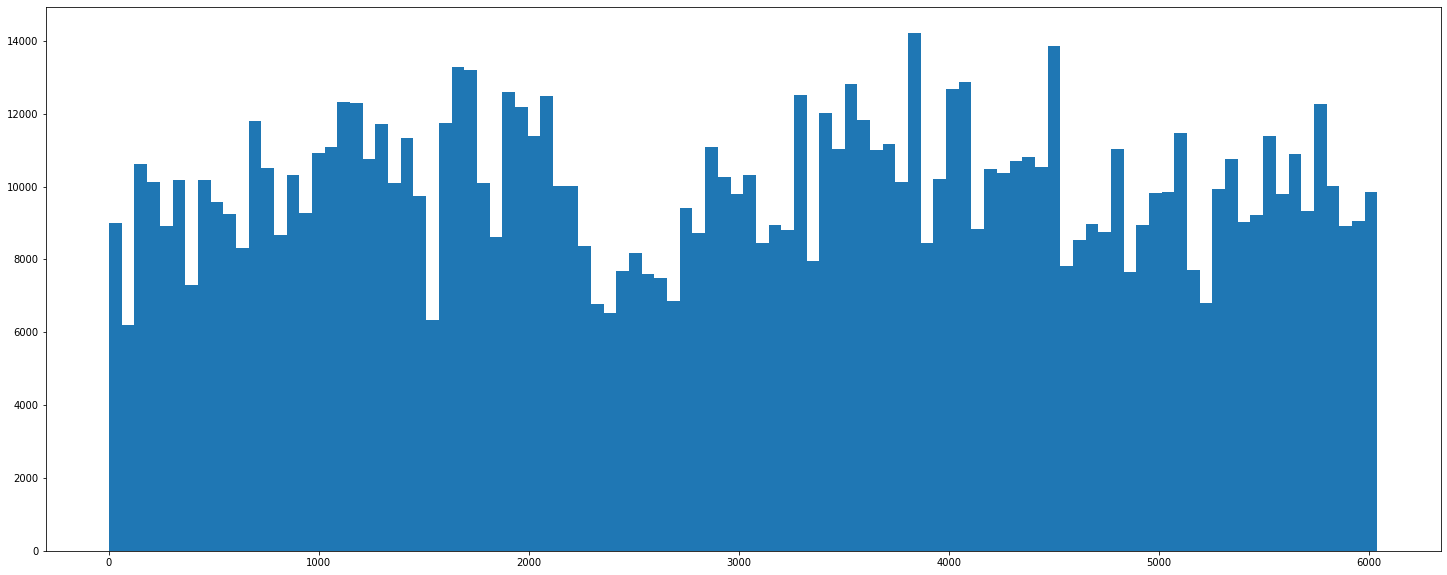

In [29]:
plt.figure(figsize=(25,10))
plt.hist(x=[ratings_data.UserID], bins=100)
plt.show()

In [30]:
#toy story data
toystory_data = ratings_data[ratings_data.MovieID==1]
toystory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [31]:
toystory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

###### Toystory is rated mostly in range 4-5. Very few users have given rating of 1 and 2.

In [32]:
toystory_data_group = toystory_data.groupby('Rating')
toystory_data_group.agg({'Rating':'mean'})

,Rating
Rating,
1,1
2,2
3,3
4,4
5,5


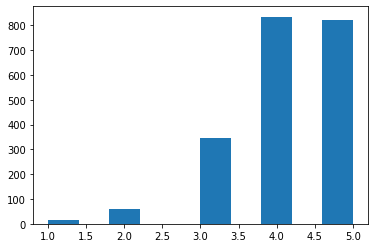

In [33]:
plt.hist(x=toystory_data['Rating'])
plt.show()

In [34]:
#viewership by age
viewership = pd.merge(ratings_data, users_data, how='left', left_on=['UserID'], right_on=['UserID'])

In [35]:
viewership.shape

(1000209, 8)

In [36]:
ratings_data.shape

(1000209, 4)

In [37]:
viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [38]:
#select only 'Toystory' data
viewership_of_toystory = viewership[viewership['MovieID'] == 1]
viewership_of_toystory.shape

(2077, 8)

In [39]:
viewership_of_toystory.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,F,1,10,48067
469,6,1,4,978237008,F,50,9,55117
581,8,1,4,978233496,M,25,12,11413
711,9,1,5,978225952,M,25,17,61614
837,10,1,5,978226474,F,35,1,95370


In [40]:
viewership_of_toystory.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

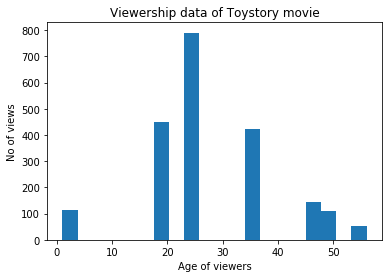

In [41]:
plt.hist(x=[viewership_of_toystory.Age], data=viewership_of_toystory, bins=20)
plt.xlabel("Age of viewers")
plt.ylabel("No of views")
plt.title("Viewership data of Toystory movie")
plt.show()

###### Majority toy story viewers are in the age range of 18 to 35. Maximum users are 25 years of age.

In [42]:
movie_rating = ratings_data.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


###### Top 25 movies by viwership data

In [43]:
#The below list shows top 25 movies by viewership data
pd.merge(top_25_movies, movie_data, how='left', left_on=['MovieID'], right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


######  Userid = 2696

In [44]:
#rating of userid = 2696
user_rating_data = ratings_data[ratings_data['UserID']==2696]
user_rating_data.head()

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920


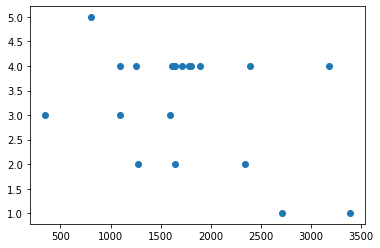

In [45]:
# plotting the above data
plt.scatter(x=user_rating_data['MovieID'], y=user_rating_data['Rating'])
plt.show()

C:\Users\win10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 2696.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\win10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 2696.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\win10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2696.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


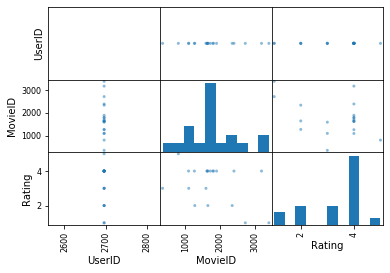

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(user_rating_data)
plt.show()

#### Split genre

In [47]:
#Split genre to get value of genre
list_genre = movie_data.Genres.str.split('|').values 
list_genre

array([list(['Animation', "Children's", 'Comedy']),
       list(['Adventure', "Children's", 'Fantasy']),
       list(['Comedy', 'Romance']), ..., list(['Drama']), list(['Drama']),
       list(['Drama', 'Thriller'])], dtype=object)

In [48]:
# Unique genre keywords
genre_labels = set()
for s in movie_data['Genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
genre_labels

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

#### One hot Encoding

In [49]:
#one hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define data for one hot encoding
genre_labels=list(genre_labels)
values = array(genre_labels)
print(values)

['War' 'Mystery' 'Romance' 'Western' 'Musical' 'Fantasy' 'Crime' 'Horror'
 'Documentary' "Children's" 'Film-Noir' 'Animation' 'Sci-Fi' 'Comedy'
 'Drama' 'Action' 'Thriller' 'Adventure']


In [50]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[16 12 13 17 11  8  5 10  6  3  9  2 14  4  7  0 15  1]


In [51]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

C:\Users\win10\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

#### Features Affecting the rating and development of Model

In [52]:
#prepare data
few_viewership = viewership.head(500)
few_viewership.shape

(500, 8)

In [53]:
few_viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(few_viewership['Age'])
x_age = le.transform(few_viewership['Age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
le.fit(few_viewership['Occupation'])
x_occ = le.transform(few_viewership['Occupation'])
x_occ

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [56]:
le.fit(few_viewership['MovieID'])
x_movieid = le.transform(few_viewership['MovieID'])
x_movieid

array([130,  78,  95, 374, 280, 132, 156, 321,  71,  96,  72,  98, 287,
       330, 107, 318, 304, 251, 355, 319, 274,  80, 154,  61, 278,  12,
       119, 211, 186,  84, 271, 364, 189,  67, 231,  86, 226, 103, 316,
        18,   0, 243, 244, 305,  29, 104, 105, 135, 252,  62, 359,  74,
       145, 161, 346, 184,  75, 264,  76, 266, 302, 121, 329, 379, 136,
       222, 205, 137, 392, 326, 342, 139, 355,  49, 260, 356, 357, 343,
       148, 194,  33, 265, 347,  92,  44, 149, 360, 185, 158, 127, 366,
       367, 368,  17, 267, 293, 225, 380,  68, 207, 398, 323, 237, 100,
       227, 324, 140, 252,  60,  50, 272,  30, 170, 113, 403,  54, 173,
       255, 151, 162, 130, 224, 163, 279, 372, 289,  69, 131, 187,  83,
       133,  70, 281,  15, 308, 297, 234, 286, 407, 239, 193, 413, 240,
       241,  28, 122, 242,  20,   3,  21, 274, 115,  46, 294,  39,  51,
       118,  97,  52, 181, 376, 166, 378, 353,  85,  56, 312, 247, 244,
       220, 331, 248,  36, 135, 246, 400, 143,  41, 144, 145, 41

In [57]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New MovieID'] = x_movieid

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [58]:
# Feature Selection
x_input = few_viewership[['New Age','New Occupation','New MovieID']]
y_target = few_viewership['Rating']

In [59]:
x_input.head()

,New Age,New Occupation,New MovieID
0,0,2,130
1,0,2,78
2,0,2,95
3,0,2,374
4,0,2,280


In [60]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [61]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [62]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

C:\Users\win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [63]:
result = logitReg.predict(x_test)

In [64]:
estimated = pd.Series(result, name='Estimated Values')

In [65]:
final_result = pd.concat([y_test, estimated], axis=1)

In [66]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.328
[[ 0  0  1  2  0]
 [ 0  0  5 13  0]
 [ 0  0 11 28  0]
 [ 0  0 10 30  0]
 [ 0  0  6 19  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        18
           3       0.33      0.28      0.31        39
           4       0.33      0.75      0.45        40
           5       0.00      0.00      0.00        25

    accuracy                           0.33       125
   macro avg       0.13      0.21      0.15       125
weighted avg       0.21      0.33      0.24       125



C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###### Logistic regression gives a accuracy score of 32.8% with a random sample of 500 users. Test datset size : 125 , as per confusion matrix correct prediction for 41 cases. 

In [67]:
#import KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [68]:
#instantiate KNN estimator
knn = KNeighborsClassifier(n_neighbors=1)

In [69]:
#print the knn
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [70]:
#fit data in KNN estimator with movie and userid as feature
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [71]:
#Testing
predicted = knn.predict(x_test)
predicted

array([4, 5, 5, 3, 4, 3, 1, 4, 2, 5, 3, 4, 4, 5, 3, 4, 5, 3, 3, 2, 5, 4,
       3, 1, 4, 5, 4, 1, 2, 4, 5, 3, 4, 3, 5, 3, 4, 4, 4, 2, 3, 5, 4, 5,
       4, 3, 5, 4, 4, 4, 4, 4, 5, 3, 1, 3, 4, 3, 4, 5, 4, 5, 5, 3, 3, 4,
       3, 2, 2, 4, 3, 2, 5, 4, 4, 4, 4, 2, 1, 4, 3, 4, 3, 5, 4, 3, 5, 4,
       5, 5, 1, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 5, 2, 2, 4, 2, 2, 1, 3, 4,
       5, 2, 4, 4, 5, 5, 3, 5, 4, 5, 5, 2, 3, 4, 1])

In [72]:
#Evaluate the accuracy of  model
from sklearn import metrics
x= metrics.accuracy_score(y_test,predicted)
print(x)

0.232


###### KNN gives 23 % accuracy with a random sample size of 500 users.

In [73]:
#Confusion Matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[ 0  0  2  1  0]
 [ 2  2  5  5  4]
 [ 2  3  9 15 10]
 [ 3  7  9 12  9]
 [ 1  2  4 12  6]]


In [74]:
#Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.14      0.11      0.12        18
           3       0.31      0.23      0.26        39
           4       0.27      0.30      0.28        40
           5       0.21      0.24      0.22        25

    accuracy                           0.23       125
   macro avg       0.19      0.18      0.18       125
weighted avg       0.24      0.23      0.24       125

